# This notebook is used to generate Functional Connectivity Matrix for all of the nifty BOLD images in the directory ..\\..\\data\\fMRI\\fMRI 

In [1]:
import numpy as np
import glob
import pathlib
from nilearn.datasets import fetch_atlas_msdl, fetch_atlas_aal, fetch_development_fmri, fetch_atlas_difumo
from nilearn.image import load_img
from nilearn.maskers import NiftiMapsMasker, NiftiLabelsMasker
from nilearn.connectome import ConnectivityMeasure
from nilearn import plotting
from nilearn.interfaces.fmriprep import load_confounds_strategy

### Defining a functions for generating FC matrix and testing the validity of the FC matrix from a path to 1 nifty file

In [2]:
def MaskerBuilder(atlas):
    atlas_filename = atlas["maps"]
    labels = atlas["labels"]
    masker = NiftiMapsMasker(
        maps_img=atlas_filename,
        standardize="zscore_sample",
        standardize_confounds="zscore_sample",
        memory="nilearn_cache",
    )
    return masker

In [3]:
def TimeSeriesExtractor(img_path, masker):
    nifti_path = img_path
    fmri_img = load_img(nifti_path)
    time_series = masker.fit_transform(fmri_img)
    return time_series

In [4]:
def FCMGenerator(img_path, masker):
    time_series = TimeSeriesExtractor(img_path=img_path, masker=masker)
    correlation_measure = ConnectivityMeasure(
        kind="correlation",
        standardize="zscore_sample",
    )
    correlation_matrix = correlation_measure.fit_transform([time_series])[0]
    np.fill_diagonal(correlation_matrix, 0)
    return correlation_matrix


#### Testing the functions above

In [5]:
path = '..\\..\\data\\fMRI\\fMRI\\sub-StrokeR01001S_ses-A_task-rest_dir-PA_run-1_bold.nii.gz'
atlas = fetch_atlas_difumo(dimension=64, resolution_mm=2, legacy_format=True) #choose atlas as diFuMo because nifty images are BOLDS
masker = MaskerBuilder(atlas)

[get_dataset_dir] Dataset found in C:\Users\Administrator\nilearn_data\difumo_atlases


d:\Python313\Lib\site-packages\nilearn\maskers\base_masker.py:282: UserWarning: memory_level is currently set to 0 but a Memory object has been provided. Setting memory_level to 1.
  return self.transform_single_imgs(


(64, 64)


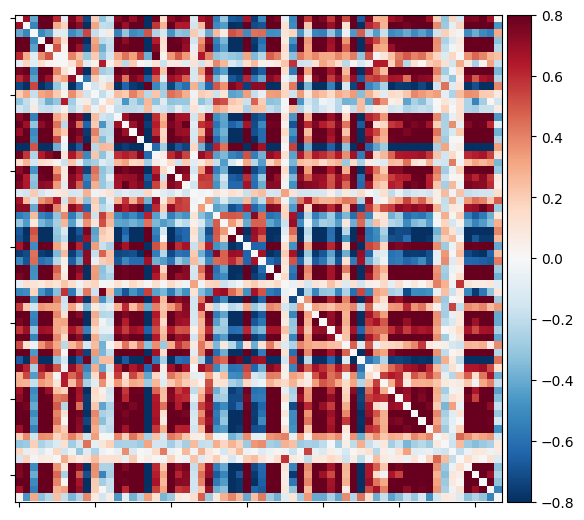

In [6]:
FCM = FCMGenerator(path, masker)
plotting.plot_matrix(
    FCM, labels=None, colorbar=True, vmax=0.8, vmin=-0.8, 
)
print(FCM.shape)

In [7]:
# report

#### Finish testing

## Function for loading all nifty files within a directory path

In [8]:
def GetNiftyPaths(dir_path):
    return list(pathlib.Path(dir_path).glob('*.nii.gz'))

In [9]:
files_path = '..\\..\\data\\fMRI\\fMRI'
nifty_paths = GetNiftyPaths(files_path)
nifty_paths

[WindowsPath('../../data/fMRI/fMRI/sub-StrokeR01001S_ses-A_task-rest_dir-PA_run-1_bold.nii.gz'),
 WindowsPath('../../data/fMRI/fMRI/sub-StrokeR01002S_ses-A_task-rest_dir-PA_run-1_bold.nii.gz'),
 WindowsPath('../../data/fMRI/fMRI/sub-StrokeR01004C_ses-A_task-rest_dir-PA_run-1_bold.nii.gz'),
 WindowsPath('../../data/fMRI/fMRI/sub-StrokeR01005C_ses-A_task-rest_dir-PA_run-1_bold.nii.gz'),
 WindowsPath('../../data/fMRI/fMRI/sub-StrokeR01006C_ses-A_task-rest_dir-PA_run-1_bold.nii.gz'),
 WindowsPath('../../data/fMRI/fMRI/sub-StrokeR01007C_ses-A_task-rest_dir-PA_run-1_bold.nii.gz'),
 WindowsPath('../../data/fMRI/fMRI/sub-StrokeR01008C_ses-A_task-rest_dir-PA_run-1_bold.nii.gz'),
 WindowsPath('../../data/fMRI/fMRI/sub-StrokeR01009C_ses-A_task-rest_dir-PA_run-1_bold.nii.gz'),
 WindowsPath('../../data/fMRI/fMRI/sub-StrokeR01011S_ses-A_task-rest_dir-PA_run-1_bold.nii.gz'),
 WindowsPath('../../data/fMRI/fMRI/sub-StrokeR01012S_ses-A_task-rest_dir-PA_run-1_bold.nii.gz'),
 WindowsPath('../../data/fMRI/

## Function for saving Functional Connectivity Matrix to a path

In [10]:
def SaveFCM(output_dir, output_file_name, FCM):
    full_path = output_dir / output_file_name
    np.savetxt(full_path, FCM)
    b = np.loadtxt(full_path)
    return FCM == b

## The whole pipeline

In [11]:
import re
def location_of_pattern_in_string(pattern, string): #Helper function for getting the sub...
    match = re.search(pattern, string)
    if match:
        return match.start()
    else:
        return None

In [12]:
preprocessed_data_dir = pathlib.Path('..\\..\\preprocessed_data\\fMRI')
atlas = fetch_atlas_difumo(dimension=64, resolution_mm=2, legacy_format=True) #choose atlas as diFuMo because nifty images are BOLDS
masker = MaskerBuilder(atlas)
for path in nifty_paths:
    FCMatrix = FCMGenerator(path, masker)
    path_as_str = path.__str__()
    start = location_of_pattern_in_string("sub-Stroke", path_as_str)
    end = location_of_pattern_in_string("_", path_as_str)
    filename = path_as_str[start:end] + "-FC_Matrix" + ".txt"
    SaveFCM(output_dir=preprocessed_data_dir, output_file_name=filename, FCM=FCMatrix)

    

[get_dataset_dir] Dataset found in C:\Users\Administrator\nilearn_data\difumo_atlases


d:\Python313\Lib\site-packages\nilearn\maskers\base_masker.py:282: UserWarning: memory_level is currently set to 0 but a Memory object has been provided. Setting memory_level to 1.
  return self.transform_single_imgs(
